# Introduction To Neural Networks General Assembly Class

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy.random as nr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 5000)
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly_express as px

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#displaying numbers instead of scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
#import the data from tensorflow, its a built in data set
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28), y_train shape: (60000,), x_test shape: (10000, 28, 28), y_test shape: (10000,)


y = 2 Pullover


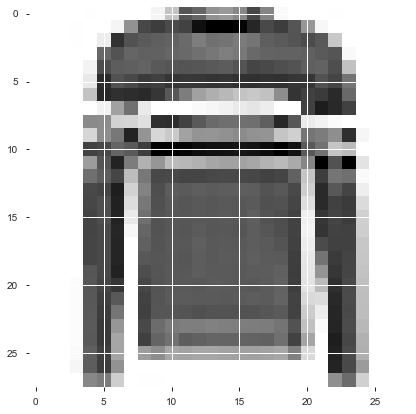

In [11]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the labels, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.figure(figsize = (12, 7))
plt.imshow(x_train[img_index]);

In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [14]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [15]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [16]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
#looking at epoch model performance during training 
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.6102 - accuracy: 0.7744
Epoch 00001: val_loss improved from inf to 0.38321, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.6101 - accuracy: 0.7744 - val_loss: 0.3832 - val_accuracy: 0.8690
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4155 - accuracy: 0.8483
Epoch 00002: val_loss improved from 0.38321 to 0.32068, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 58s 1ms/sample - loss: 0.4155 - accuracy: 0.8483 - val_loss: 0.3207 - val_accuracy: 0.8854
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3705 - accuracy: 0.8652
Epoch 00003: val_loss improved from 0.32068 to 0.29681, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 55s 991us/sample - loss: 0.3704 - accuracy: 

In [18]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [19]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9063


Text(0.5, 1.0, 'Sandal (Sandal)')

Text(0.5, 1.0, 'T-shirt/top (Shirt)')

Text(0.5, 1.0, 'Shirt (Pullover)')

Text(0.5, 1.0, 'Coat (Coat)')

Text(0.5, 1.0, 'Coat (Coat)')

Text(0.5, 1.0, 'Trouser (Trouser)')

Text(0.5, 1.0, 'T-shirt/top (T-shirt/top)')

Text(0.5, 1.0, 'Ankle boot (Ankle boot)')

Text(0.5, 1.0, 'Trouser (Trouser)')

Text(0.5, 1.0, 'Sandal (Sandal)')

Text(0.5, 1.0, 'Pullover (Pullover)')

Text(0.5, 1.0, 'T-shirt/top (T-shirt/top)')

Text(0.5, 1.0, 'Coat (Coat)')

Text(0.5, 1.0, 'Coat (Coat)')

Text(0.5, 1.0, 'Sandal (Sandal)')

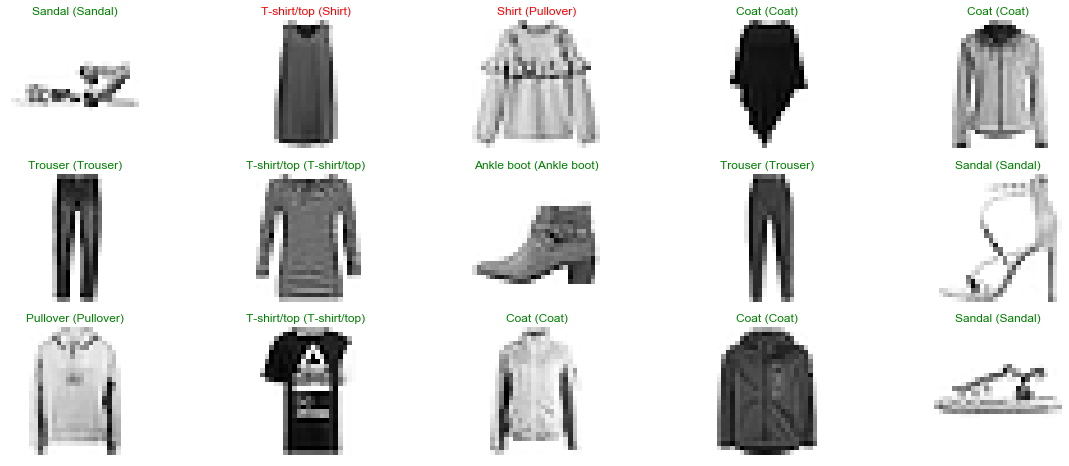

In [23]:
#getting predictions and visualizing them
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[]);
    # Display each image
    ax.imshow(np.squeeze(x_test[index]));
    predict_index = np.argmax(y_hat[index]);
    true_index = np.argmax(y_test[index]);
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"));

In [29]:
#modeling with SHAP
# #choosing a background for the image, a set of background examples to use
# background = x_train[np.random.choice(x_train.shape[0], 100, replace = False)]

# #explain the predictions 
# e = shap.DeepExplainer(model, background)

# #select some values
# shap_values = e.shap_values(x_test[2:8])

# shap.image_plot(shap_values, -x_test[2:8])